In [5]:
# Let's import the modules we need and the data

import time
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

day_1 = pd.read_csv("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Homelike//bq-results-20210714.csv")
day_2 = pd.read_csv("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Homelike//bq-results-20210715.csv")
day_3 = pd.read_csv("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Homelike//bq-results-20210716.csv")
day_4 = pd.read_csv("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Homelike//bq-results-20210717.csv")
day_5 = pd.read_csv("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Homelike//bq-results-20210718.csv")

df = pd.concat([day_1, day_2, day_3, day_4, day_5], ignore_index=True)

In [6]:
df.isnull().sum()

datetime                       0
event_type                     0
test_groups                    0
session_id                  5299
visitor_id                  1975
user_location_country      53087
user_location_city         52803
device_class                   0
device_family                  0
device_browser                 0
page_type                      0
page_country             1131723
page_city                1131891
apartment_id             1324809
params                         0
environemnt                    0
is_internal_ip                 0
dtype: int64

In [8]:
# We have null values

# Let's check the datatypes of the columns, and make sure a date is a date

df.dtypes

datetime                 object
event_type               object
test_groups              object
session_id               object
visitor_id               object
user_location_country    object
user_location_city       object
device_class             object
device_family            object
device_browser           object
page_type                object
page_country             object
page_city                object
apartment_id             object
params                   object
environemnt              object
is_internal_ip             bool
dtype: object

In [10]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.dtypes

datetime                 datetime64[ns, UTC]
event_type                            object
test_groups                           object
session_id                            object
visitor_id                            object
user_location_country                 object
user_location_city                    object
device_class                          object
device_family                         object
device_browser                        object
page_type                             object
page_country                          object
page_city                             object
apartment_id                          object
params                                object
environemnt                           object
is_internal_ip                          bool
dtype: object

In [11]:
# Now let's see which columns can be transformed into categories#

col = df.columns
for c in col:
    print("the column {} has {} unique values".format(c, df[c].nunique()))

the column datetime has 1446759 unique values
the column event_type has 191 unique values
the column test_groups has 39 unique values
the column session_id has 94699 unique values
the column visitor_id has 80571 unique values
the column user_location_country has 201 unique values
the column user_location_city has 11227 unique values
the column device_class has 5 unique values
the column device_family has 831 unique values
the column device_browser has 41 unique values
the column page_type has 6 unique values
the column page_country has 30 unique values
the column page_city has 879 unique values
the column apartment_id has 12570 unique values
the column params has 413906 unique values
the column environemnt has 2 unique values
the column is_internal_ip has 2 unique values


In [12]:
# maybe device class, page_type, environment

for a in ["device_class", "page_type", "environemnt", "test_groups", "device_browser", "page_country"]:
    df[a] = df[a].astype("category")

In [13]:
# now let's create some variables analyzing for time

df["datetime_os"] = df["datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
df["day"] = df.datetime.dt.day
df["weekday"] = df.datetime.dt.weekday
df["wday"] = df.datetime.dt.strftime("%A")
df["time"] = df.datetime.dt.time
df["hour"] = df.datetime.dt.hour

df["wday"] = df.wday.astype("category")
df["wday"] = pd.Categorical(df.wday, ["Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df["datetime_om"] = df["datetime"].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))

In [14]:
''' Design reports , monitor KPIs and provide executive summaries
to product teams and stakeholders around our user behaviour.'''

# First, let's take a look at visits over time to the webpage. We need to assign each
# event with a value 1, so that we can sum that row

df["ev"] = 1

In [15]:
# How many different sessions we had

df.session_id.nunique()

94699

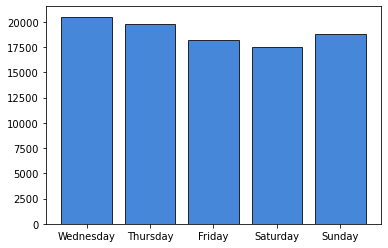

In [16]:
# session_ids by weekday

sessions_wh = df[["session_id", "event_type", "datetime_os", "wday", "hour"]].sort_values(by=["session_id", "datetime_os"])
sessions_wh = sessions_wh.drop_duplicates(subset="session_id", keep="first")

s_wd = sessions_wh.groupby(by="wday", as_index=False).session_id.count()

plt.bar("wday", "session_id", data=s_wd, edgecolor="black", color="#1969d1", alpha=0.8)
plt.show()

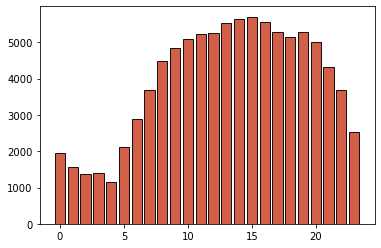

In [17]:
# session_ids by hour

s_h = sessions_wh.groupby(by="hour", as_index=False).session_id.count()

plt.bar("hour", "session_id", data=s_h, edgecolor="black", color="#cf4d34", alpha=0.9)
plt.show()

In [18]:
# let's make a function that will groupby the date dimension, sum the ev, and then
# plot a line

def group_plot(df, timedim, ft):
    df_t = df.groupby(by=timedim, as_index=False)[ft].sum()
    plt.bar(timedim, ft, data=df_t, edgecolor="black")
    plt.title("Number of events per {}".format(timedim))
    plt.xlabel(timedim)
    plt.ylabel("Number of events")
    plt.show()

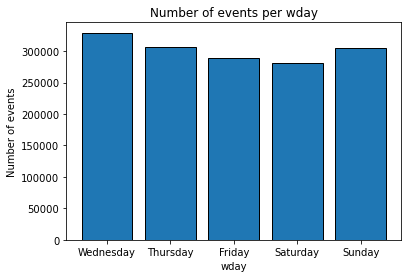

In [19]:
# grouping by weekday

group_plot(df, "wday", "ev")

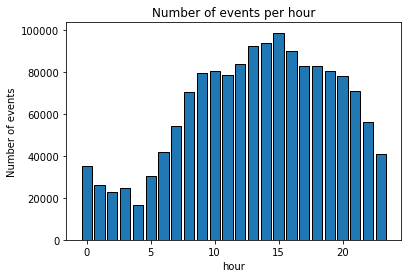

In [20]:
# grouping by hour

group_plot(df, "hour", "ev")

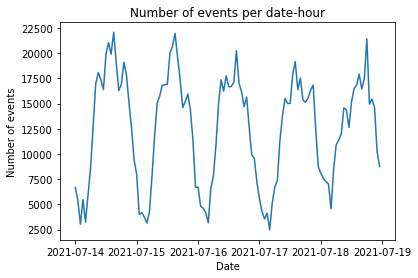

In [21]:
# grouping by date hour and making a lineplot

a = df.groupby(by="datetime_om", as_index=False).ev.sum()

plt.plot("datetime_om", "ev", data=a)
plt.title("Number of events per date-hour")
plt.xlabel("Date")
plt.ylabel("Number of events")
plt.show()

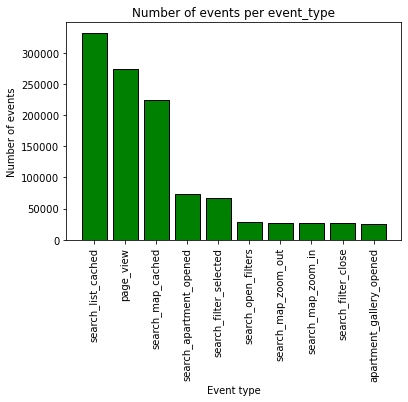

In [22]:
# How many events we have of each type? Check the distribution of events according to event type

b = df.groupby(by="event_type", as_index=False).ev.sum().sort_values("ev", ascending=False).head(10)
c = df.groupby(by="event_type", as_index=False).ev.sum().sort_values("ev", ascending=False).tail(10)

plt.bar("event_type", "ev", data=b, edgecolor="black", color="green")
plt.title("Number of events per event_type")
plt.xlabel("Event type")
plt.ylabel("Number of events")
plt.xticks(rotation = 90)
plt.show()


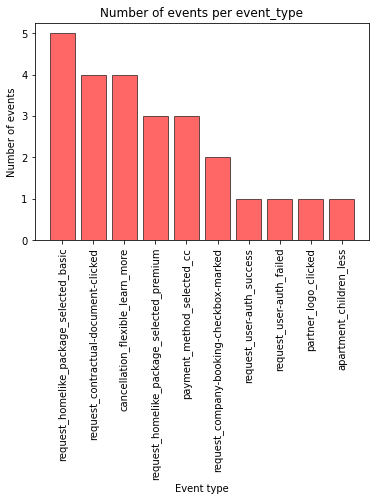

In [24]:
plt.bar("event_type", "ev", data=c, edgecolor="black", color="red", alpha=0.6)
plt.title("Number of events per event_type")
plt.xlabel("Event type")
plt.ylabel("Number of events")
plt.xticks(rotation = 90)
plt.show()

In [25]:
# Let's look at session id. 

df.session_id.nunique()

94699

In [26]:
# There are 94.699 sessions, and there were 1.509.775 events. Avg events by session?

In [27]:
avg_event_by_session = df.shape[0]/df.session_id.nunique()
avg_event_by_session

15.942882184605962

In [29]:
# visitor_id, how many do we have? How many events on average does each visitor have?

total_visitors = df["visitor_id"].nunique()
avg_event_by_visitor = df.shape[0]/total_visitors
avg_event_by_visitor

18.738441871144705

In [30]:
# different visitor ids. 50 visitor_ids with the most sessions?

df["visitor_id"].nunique()
df_visit_id = df.sort_values(by=["visitor_id", "datetime_os"]).drop_duplicates(subset=["visitor_id", "session_id"], keep="first")
v_most_sessions = df_visit_id.groupby(by="visitor_id", as_index=False).session_id.count().sort_values(by="session_id", ascending=False).head(50)
print(v_most_sessions)

                                     visitor_id  session_id
61743  c410e56504b3814484700518a58254e7e7cc2820          68
23780  4befd5cbf8a98a5fe659b261e890096f95eb5270          50
13534  2b08e7bfbab4a1dbca9f16435a6e5bda98bed515          41
44887  8ee0b1a18760d9b8fe22509727848e78bc240e1d          40
17034  363c814d50a28731b76429d66497f121589c7e81          30
17118  3682f637b8f174fb60f349ac02debe8a0675e656          22
44843  8eb96dc43ca499d79c57b349ed36c020f2e02484          20
31610  6557073884ea0c3563249305f5c9d97a10f9803f          20
25038  502a0c2436a5e9336be1d2f42bf6f3822bd77f6e          19
63680  ca432d1fea7a1ee6ce34dffe7cad1fced06ce52b          18
60354  bfccbcca92872b94de87e3d33dbbd80e09c71284          17
13338  2a634bc6f0a6141a8ce0082a0b5da47d8a09a864          17
67714  d72a3286dbee52264eb91617fa6536a45b1068ab          16
12689  2843bd32895a7e9db2df741184caba8970119784          16
107    00532a84148804a7c385e7e71280dff932e1720a          15
55316  afffd0c3d7520a9818e6adca2eaef0421

In [33]:
# visitor_id by number of events? Let's take a look at top 50 visitors with the most events, and average events by visitor

top_50_visitors_by_events = df.groupby(by="visitor_id", as_index=False).session_id.count().sort_values(by="session_id", ascending=False).head(50)
top_50_visitors_by_events["session_id"].mean()

1125.52

In [34]:
t50 = list(top_50_visitors_by_events["visitor_id"])
visitor_by_events_not50 = df.loc[~df.visitor_id.isin(t50), :].groupby(by="visitor_id", as_index=False).session_id.count().sort_values(by="session_id", ascending=False)
visitor_by_events_not50["session_id"].mean()

17.98537027607705

In [ ]:
# for the top 50 visitors with the most events, they have 1125 events on average
# for all the non top 50 visitors, they have 18 events on average

In [35]:
# avg time spent on the webpage? For top 50 with more visits and all?

df["datetime_os"] = pd.to_datetime(df["datetime_os"])
df.dtypes

datetime                 datetime64[ns, UTC]
event_type                            object
test_groups                         category
session_id                            object
visitor_id                            object
user_location_country                 object
user_location_city                    object
device_class                        category
device_family                         object
device_browser                      category
page_type                           category
page_country                        category
page_city                             object
apartment_id                          object
params                                object
environemnt                         category
is_internal_ip                          bool
datetime_os                   datetime64[ns]
day                                    int64
weekday                                int64
wday                                category
time                                  object
hour      

In [36]:
sessions = df[["session_id", "event_type", "datetime_os"]].sort_values(by=["session_id", "datetime_os"])

ind_sessions = pd.Series(sessions["session_id"].unique())
ind_sessions = ind_sessions.reindex(ind_sessions)

min_per_session = sessions.groupby(by="session_id").datetime_os.min()
max_per_session = sessions.groupby(by="session_id").datetime_os.max()

sessions_time = pd.concat([ind_sessions, min_per_session, max_per_session], axis=1, join="inner")
sessions_time = sessions_time.reset_index()
sessions_time = sessions_time.drop(0, axis=1)
sessions_time.rename(columns={"index" : "session_id", "datetime_os" : "first_event", "datetime_os" : "last_event"}, inplace=True)
sessions_time["duration"] = sessions_time.iloc[:, 2] - sessions_time.iloc[:, 1]

sessions_time["duration"].mean()

Timedelta('0 days 00:14:56.429043601')

In [38]:
# for all sessions, the average time spent on the web is 14:56 minutes

In [39]:
sessions_time.sort_values(by="duration", ascending=False).head(50).mean()

<ipython-input-39-ef5091595596>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sessions_time.sort_values(by="duration", ascending=False).head(50).mean()


duration   2 days 15:30:44.660000
dtype: timedelta64[ns]

In [40]:
# for top 50 sessions, average duration is 39 hours and 30 minutes

In [41]:
def groupby_count(d, c):
    abc = d.groupby(by=c, as_index=False).ev.sum().sort_values(by="ev", ascending=False)
    return abc

In [42]:
# let's see the distribution of events by different dimensions

groupby_count(df, "user_location_country").head(10)
groupby_count(df, "device_class").head(10)
groupby_count(df, "device_family").head(10)
groupby_count(df, "device_browser").head(10)
groupby_count(df, "page_type").head(10)
groupby_count(df, "page_country").head(10)
groupby_count(df, "page_city").head(10)
groupby_count(df, "apartment_id").head(10)
groupby_count(df, "params").head(10)
groupby_count(df, "environemnt").head(10)
groupby_count(df, "is_internal_ip").head(10)

,is_internal_ip,ev
0,False,1504560
1,True,5215


In [43]:
# let's see the distribution of sessions by different dimensions. First we need to 
# obtain a df with 1 row per session, so we're going to keep the first event of each session.

df_sessions = df.drop_duplicates(subset="session_id", keep="first")

def groupby_count2(d, c):
    abc = d.groupby(by=c, as_index=False).session_id.count().sort_values(by="session_id", ascending=False)
    return abc

groupby_count2(df_sessions, "user_location_country").head(10)
groupby_count2(df_sessions, "device_class").head(10)
groupby_count2(df_sessions, "device_family").head(10)
groupby_count2(df_sessions, "device_browser").head(10)
groupby_count2(df_sessions, "page_type").head(10)
groupby_count2(df_sessions, "page_country").head(10)
groupby_count2(df_sessions, "page_city").head(10)
groupby_count2(df_sessions, "apartment_id").head(10)
groupby_count2(df_sessions, "params").head(10)
groupby_count2(df_sessions, "environemnt").head(10)
groupby_count2(df_sessions, "is_internal_ip").head(10)

,is_internal_ip,session_id
0,False,94575
1,True,124


In [44]:
# let's see the distribution of visitor_id by different dimensions. First we need to
# obtain a df with 1 row per visitor, so we're going to keep the first event for each visitor

df_visitors = df.drop_duplicates(subset="visitor_id", keep="first")

def groupby_count3(d, c):
    abc = d.groupby(by=c, as_index=False).visitor_id.count().sort_values(by="visitor_id", ascending=False)
    return abc

groupby_count3(df_visitors, "user_location_country").head(10)
groupby_count3(df_visitors, "device_class").head(10)
groupby_count3(df_visitors, "device_family").head(10)
groupby_count3(df_visitors, "device_browser").head(10)
groupby_count3(df_visitors, "page_type").head(10)
groupby_count3(df_visitors, "page_country").head(10)
groupby_count3(df_visitors, "page_city").head(10)
groupby_count3(df_visitors, "apartment_id").head(10)
groupby_count3(df_visitors, "params").head(10)
groupby_count3(df_visitors, "environemnt").head(10)
groupby_count3(df_visitors, "is_internal_ip").head(10)

,is_internal_ip,visitor_id
0,False,80487
1,True,84


In [47]:
# What is the overall conversion rate on a given day?

dateb = datetime(2021, 7, 15, 0, 0, 0)
df_day1 = df.loc[df.datetime_os < dateb, :]

df_day1.columns
df_day1.sort_values(by="event_type").event_type.unique()

array(['apartment_adult_less', 'apartment_adult_more',
       'apartment_back-to-search_button', 'apartment_back-to-top',
       'apartment_click_moreapartmentsincity',
       'apartment_close_price_discount_tooltip',
       'apartment_close_servicefee_modal', 'apartment_date_change',
       'apartment_date_init', 'apartment_date_init_unavailable',
       'apartment_enhanced_cleaning_close',
       'apartment_enhanced_cleaning_learn_more',
       'apartment_enhanced_cleaning_open', 'apartment_gallery_closed',
       'apartment_gallery_opened', 'apartment_image_click',
       'apartment_intercom_open', 'apartment_open-request-box',
       'apartment_open_price_discount_tooltip',
       'apartment_open_servicefee_modal', 'apartment_pdf_generated',
       'apartment_saved', 'apartment_section_amenities_collapsed',
       'apartment_section_amenities_expanded',
       'apartment_section_amenities_selected',
       'apartment_section_amenities_show-all',
       'apartment_section_area_showm

In [48]:
# Let's say when an event is "request_payment_submission_success"
# this means somebody purchased. How many sessions we have in day1?
# How many events of this kind?

df_purch = df_day1.loc[df_day1.event_type == "request_payment_submission_success", :]
tot_pur_d1 = df_purch.shape[0]

tot_sess_d1 = df_day1.session_id.nunique()

conversion_day1 = tot_pur_d1/tot_sess_d1

In [49]:
# conversion is aprox 0.1756%

In [51]:
# Conversion rate for users in Berlin?

df_day1.user_location_city.value_counts()
df_berlin = df_day1.loc[df_day1.user_location_city == "Berlin", :]

berlin_sessions = df_berlin.session_id.nunique()
df_purch_b = df_berlin.loc[df_berlin.event_type == "request_payment_submission_success", :]

conversion_berlin = df_purch_b.shape[0]/berlin_sessions

In [52]:
# conversion for user located in Berlin is aprox 0.5%

In [53]:
df["test_groups"] = df["test_groups"].astype("object")

# We need to be able to access the dictionary in each row, which is why we use this function

df["test_groups"] = df["test_groups"].map(eval)

In [54]:
e = []

for i in range(0, len(df)):
    if "rcsp" in list(df["test_groups"][i].keys()):
        x = df["test_groups"][i]["rcsp"]
        e.append(x)
    else:
        e.append("no rcsp found in dictionary")


In [ ]:
# now we have a list which has, for each event, whether it was rscp=show or rscp=something else
# let's add a new column to the df

In [55]:
df["A/B"] = e
df["A/B"].value_counts()

show                           759083
ref                            750683
no rcsp found in dictionary         9
Name: A/B, dtype: int64

In [56]:
# How many events do we have on each page_type?

df.page_type.value_counts()

search_page                 1098980
apartment_view               388809
request/initial               20108
request/checkout               1288
request/success                 321
request/rental-agreement        269
Name: page_type, dtype: int64

In [57]:
# now, let's isolate the rows for the users that experienced faster loading time

df_bt = df.loc[(df.page_type == "search_page") & (df["A/B"] == "show"), :]

# for these rows in df_bt, how many sessions we have?

df_bt.session_id.nunique()

33605

In [58]:
df_bt.loc[df_bt.event_type == "request_payment_submission_success", :]

# We do not have sales because we are on a search_page, however, we can isolate this
# session_id that we know had faster loading times, and check how much they bought
# how much time they spent on webpage, number of events

,datetime,event_type,test_groups,session_id,visitor_id,user_location_country,user_location_city,device_class,device_family,device_browser,...,is_internal_ip,datetime_os,day,weekday,wday,time,hour,datetime_om,ev,A/B


In [59]:
B_sessions_total = df_bt.session_id.nunique()
B_sessions = list(df_bt.session_id.unique())

# how many of these sessions had a purchase? First let's filter df to only have these session_IDs

df_B_sessions = df.loc[df.session_id.isin(B_sessions), :]

# Now, out of the 33.605 sessions, how many sales we have?

df_B_sessions.loc[df_B_sessions.event_type == "request_payment_submission_success", :]

# we have 35 sales, what is the conversion then for B?

conversion_B = 35/33605

# conversion for B is around 0.001 or 0.1%. Now let's look at conversion for A, all the sessionids not in B

df_A_sessions = df.loc[~df.session_id.isin(B_sessions), :]

df_A_sessions.session_id.nunique()

# Now, out of the 61094 sessions, how many sales?

df_A_sessions.loc[df_A_sessions.event_type == "request_payment_submission_success", :]

# We have 106 sales, what is the conversion for A then?

conversion_A = 106/61094

# the sessions that had faster loading times actually had worse conversion rate!

In [60]:
# number of average events by session?

df_B_sessions.shape[0]/33605
df_A_sessions.shape[0]/61094

13.330899924706191

In [61]:
# Now let's take cate of the average time spent by session on group A and B

sessions_A = df_A_sessions[["session_id", "event_type", "datetime_os"]].sort_values(by=["session_id", "datetime_os"])

ind_sessions_A = pd.Series(sessions_A["session_id"].unique())
ind_sessions_A = ind_sessions_A.reindex(ind_sessions_A)

min_per_session_A = sessions_A.groupby(by="session_id").datetime_os.min()
max_per_session_A = sessions_A.groupby(by="session_id").datetime_os.max()

sessions_time_A = pd.concat([ind_sessions_A, min_per_session_A, max_per_session_A], axis=1, join="inner")
sessions_time_A = sessions_time_A.reset_index()
sessions_time_A = sessions_time_A.drop(0, axis=1)
sessions_time_A.rename(columns={"index" : "session_id", "datetime_os" : "first_event", "datetime_os" : "last_event"}, inplace=True)
sessions_time_A["duration"] = sessions_time_A.iloc[:, 2] - sessions_time_A.iloc[:, 1]

sessions_time_A["duration"].mean()

Timedelta('0 days 00:14:07.135872589')

In [62]:
# For the A group (regular loading time), the sessions lasted on average 14:07 minutes. Now let's take a look at B

In [63]:
sessions_B = df_B_sessions[["session_id", "event_type", "datetime_os"]].sort_values(by=["session_id", "datetime_os"])

ind_sessions_B = pd.Series(sessions_B["session_id"].unique())
ind_sessions_B = ind_sessions_B.reindex(ind_sessions_B)

min_per_session_B = sessions_B.groupby(by="session_id").datetime_os.min()
max_per_session_B = sessions_B.groupby(by="session_id").datetime_os.max()

sessions_time_B = pd.concat([ind_sessions_B, min_per_session_B, max_per_session_B], axis=1, join="inner")
sessions_time_B = sessions_time_B.reset_index()
sessions_time_B = sessions_time_B.drop(0, axis=1)
sessions_time_B.rename(columns={"index" : "session_id", "datetime_os" : "first_event", "datetime_os" : "last_event"}, inplace=True)
sessions_time_B["duration"] = sessions_time_B.iloc[:, 2] - sessions_time_B.iloc[:, 1]

sessions_time_B["duration"].mean()

Timedelta('0 days 00:16:26.044189852')

In [64]:
# For the B group (faster loading time), the sessions lasted on average 16:26 minutes, which is 2 minutes more than A, 1/7 more.

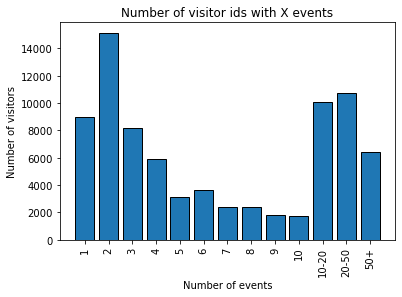

In [65]:
# Cluster our users in logical groups based on the data you have at hand

df.columns
n_unique_visitors = df.visitor_id.nunique()

# Visitor_id by number of events they each had?

clu_n_events = df.groupby(by="visitor_id", as_index=False).ev.sum().sort_values(by="ev", ascending=False)
clu_n_events.ev.describe()
clu_n_events["n_events"] = pd.cut(clu_n_events["ev"], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, np.inf], labels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "10-20", "20-50", "50+"])

clu_n_events2 = clu_n_events.groupby(by="n_events", as_index=False).visitor_id.count().sort_values(by="n_events")

plt.bar("n_events", "visitor_id", data=clu_n_events2, edgecolor="black")
plt.title("Number of visitor ids with X events")
plt.xlabel("Number of events")
plt.ylabel("Number of visitors")
plt.xticks(rotation = 90)
plt.show()

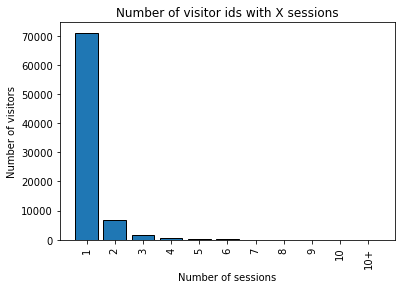

In [66]:
# Visitor_id by number of sessions they had? First we have to drop duplicates, have 1 line for each visitor_id-session combination

clu_n_sessions = df.drop_duplicates(subset=["visitor_id", "session_id"], keep="first")
clu_n_sessions2 = clu_n_sessions.groupby(by="visitor_id", as_index=False).session_id.count().sort_values(by="session_id", ascending=False)
clu_n_sessions2.session_id.describe()

clu_n_sessions2["n_sessions"] = pd.cut(clu_n_sessions2["session_id"], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf], labels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "10+"])

clu_n_sessions3 = clu_n_sessions2.groupby(by="n_sessions", as_index=False).visitor_id.count().sort_values(by="n_sessions")

plt.bar("n_sessions", "visitor_id", data=clu_n_sessions3, edgecolor="black")
plt.title("Number of visitor ids with X sessions")
plt.xlabel("Number of sessions")
plt.ylabel("Number of visitors")
plt.xticks(rotation = 90)
plt.show()

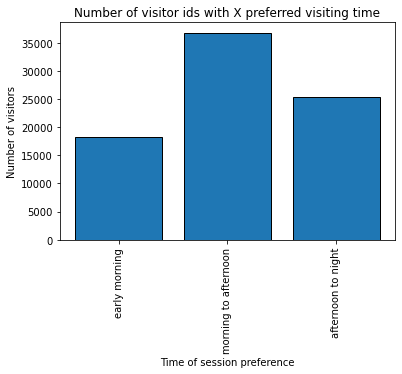

In [67]:
# Visitor_id by time of visit they had?

Z = df[["visitor_id", "session_id", "datetime_os", "event_type"]].sort_values(by=["visitor_id", "session_id", "datetime_os"])

Z2 = Z.groupby(by=["visitor_id", "session_id"], as_index=False).datetime_os.min()

Z2["hour"] = Z2["datetime_os"].dt.hour

Z2["time_of_day"] = pd.cut(Z2["hour"], bins=[0, 8, 16, 30], labels=["0-8hs", "8-16hs", "16-23hs"])
Z2["time_of_day"] = pd.Categorical(Z2["time_of_day"], ["0-8hs", "8-16hs", "16-23hs"])

Z2.time_of_day.value_counts()
Z2.time_of_day.value_counts(normalize=True)

Z2.head()

Z2 = pd.get_dummies(Z2, columns=["time_of_day"])

Z3 = Z2.groupby(by="visitor_id").session_id.count()

Z2.set_index(keys="visitor_id", inplace=True)

Z4 = Z2.groupby(by="visitor_id")["time_of_day_0-8hs"].sum()
Z5 = Z2.groupby(by="visitor_id")["time_of_day_8-16hs"].sum()
Z6 = Z2.groupby(by="visitor_id")["time_of_day_16-23hs"].sum()

Z7 = pd.concat([Z3, Z4, Z5, Z6], axis=1, join="inner")

Z7.columns

Z7["per_0_8"] = Z7["time_of_day_0-8hs"]/Z7["session_id"]
Z7["per_8_16"] = Z7["time_of_day_8-16hs"]/Z7["session_id"]
Z7["per_16_23"] = Z7["time_of_day_16-23hs"]/Z7["session_id"]

def foo(d=Z7):
        a = "early morning"
        b = "morning to afternoon"
        c = "afternoon to night"
        
        if d["per_0_8"] >= 0.5:
            return a
        elif d["per_8_16"] >= 0.5:
            return b
        elif d["per_16_23"] >= 0.5:
            return c
        else:
            return "no preference"

def foo2(d=Z7):
        a = "early morning"
        b = "morning to afternoon"
        c = "afternoon to night"
        
        if max(d["per_0_8"], d["per_8_16"], d["per_16_23"]) == d["per_0_8"]:
            return a
        elif max(d["per_0_8"], d["per_8_16"], d["per_16_23"]) == d["per_8_16"]:
            return b
        elif max(d["per_0_8"], d["per_8_16"], d["per_16_23"]) == d["per_16_23"]:
            return c
        else:
            return "no preference"

Z7["preferred_visit_time"] = Z7.apply(foo2, axis=1)

Z7["preferred_visit_time"].value_counts()
Z8 = Z7.groupby(by="preferred_visit_time", as_index=False).session_id.count()
Z8["preferred_visit_time"] = pd.Categorical(Z8.preferred_visit_time, ["early morning", "morning to afternoon", "afternoon to night"], ordered=True)
Z8 = Z8.sort_values(by="preferred_visit_time")

plt.bar("preferred_visit_time", "session_id", data=Z8, edgecolor="black")
plt.title("Number of visitor ids with X preferred visiting time")
plt.xlabel("Time of session preference")
plt.ylabel("Number of visitors")
plt.xticks(rotation = 90)
plt.show()

In [69]:
# visitor_id by avg length of visit (session)?

sessions2 = df[["visitor_id", "session_id", "event_type", "datetime_os"]].sort_values(by=["visitor_id", "session_id", "datetime_os"])
vis_ses = sessions2.groupby(by=["visitor_id", "session_id"]).event_type.count()

min_per_session2 = sessions2.groupby(by=["visitor_id", "session_id"]).datetime_os.min()
max_per_session2 = sessions2.groupby(by=["visitor_id", "session_id"]).datetime_os.max()

visit_time = pd.concat([vis_ses, min_per_session2, max_per_session2], axis=1, join="inner")
visit_time = visit_time.reset_index()
visit_time = visit_time.drop("event_type", axis=1)
visit_time["duration"] = visit_time.iloc[:, 3] - visit_time.iloc[:, 2]

visit_time.dtypes
final = pd.DataFrame(visit_time.groupby(by="visitor_id").duration.mean(numeric_only=False))
final.describe()

,duration
count,80419
mean,0 days 00:11:10.561564801
std,0 days 01:33:26.836940211
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:38
75%,0 days 00:03:08
max,4 days 03:17:05


In [70]:
# I need to make some bins for the avg duration of sessions by visitor_id

e2=[]

def foo3(d,c):
    for i in range(0, len(d)):
        X = d[c][i].total_seconds()
        e2.append(X)
    return e2

final["seconds"] = foo3(final, "duration")
final["minutes"] = final["seconds"]/60


In [71]:
# Let's remove all visitor for which average duration is 0. We have 80419 visitors

final = final[final["minutes"] > 0]

# Now we have 58029 visitors who their avg sessions last more than a minute
# this means we have 22390 visitors whose session lasted 0.

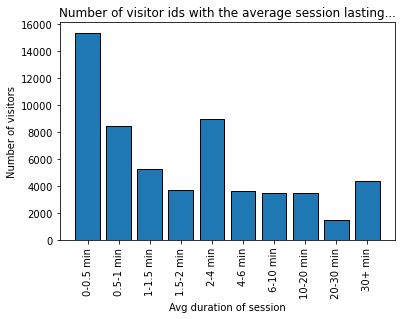

In [72]:
final.minutes.describe()
final["interval"] = pd.cut(final["minutes"], bins=[0, 0.5, 1, 1.5, 2, 4, 6, 10, 20, 30, np.inf], 
                           labels=["0-0.5 min", "0.5-1 min", "1-1.5 min", "1.5-2 min", "2-4 min", "4-6 min", "6-10 min", "10-20 min", "20-30 min", "30+ min"])

final2 = final.groupby(by="interval", as_index=False).minutes.count()

plt.bar("interval", "minutes", data=final2, edgecolor="black")
plt.title("Number of visitor ids with the average session lasting...")
plt.xlabel("Avg duration of session")
plt.ylabel("Number of visitors")
plt.xticks(rotation = 90)
plt.show()

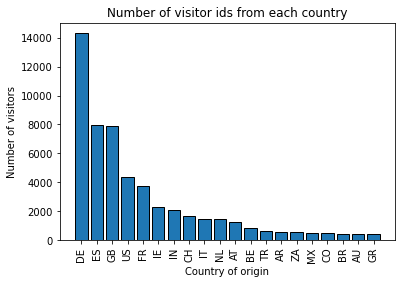

In [73]:
# visitor_id by location, user_location_country

df.columns
df.visitor_id.nunique()

df_visitors = df.drop_duplicates(subset="visitor_id", keep="first")

df_visitors["user_location_country"].value_counts().head(20).values

plt.bar(df_visitors["user_location_country"].value_counts().head(20).index, df_visitors["user_location_country"].value_counts().head(20).values, data=df_visitors["user_location_country"].value_counts().head(20), edgecolor="black")
plt.title("Number of visitor ids from each country")
plt.xlabel("Country of origin")
plt.ylabel("Number of visitors")
plt.xticks(rotation = 90)
plt.show()

In [74]:
# visitor_id by device

df_visitors["device_class"].value_counts()
df_visitors["device_family"].value_counts()
df_visitors["device_browser"].value_counts()

Mobile Safari                 23949
Chrome                        23091
Chrome Mobile                 15530
Safari                         6796
Firefox                        2727
Samsung Internet               2473
Chrome Mobile iOS              2279
Facebook                       1114
Mobile Safari UI/WKWebView     1056
Chrome Mobile WebView           523
Opera                           234
Firefox Mobile                  191
AdsBot-Google                   137
Opera Mobile                     86
Android                          71
Amazon Silk                      67
Firefox iOS                      64
Googlebot                        31
UC Browser                       29
Edge                             28
Apple Mail                       21
HeadlessChrome                   13
QQ Browser Mobile                11
Yandex Browser                   10
Pinterestbot                     10
Other                             8
Puffin                            5
Maxthon                     

In [75]:
# visitor_id by page type

df_visitors["page_type"].value_counts()

search_page                 56262
apartment_view              24171
request/initial               102
request/rental-agreement       23
request/success                11
request/checkout                3
Name: page_type, dtype: int64

In [76]:
# As a final exercise, let's look at sessions that did buy vs all the other sessions. What's the difference?

df.columns
df_success = df.loc[df.event_type == "request_payment_submission_success", :]

In [77]:
# Now let's isolate the sessions that had a success event

session_success = list(df_success.session_id.unique())

In [78]:
# Now let's analyze this sessions (number of events, duration, most common events, device)

had_a_sale = df.loc[df.session_id.isin(session_success), :]
N = had_a_sale.groupby(by="session_id", as_index=False).event_type.count()
N.event_type.min()
N.event_type.max()
N.event_type.mean()

62.41726618705036

In [79]:
N2 = sessions_time.loc[sessions_time.session_id.isin(session_success), :]

N2.duration.min()
N2.duration.max()
N2.duration.mean()

Timedelta('0 days 01:56:39.503597122')

In [80]:
had_a_sale.groupby(by="event_type", as_index=False).ev.count().sort_values(by="ev", ascending=False).head(20)

,event_type,ev
64,page_view,1686
127,search_list_cached,778
128,search_map_cached,637
95,request_state_transition,382
67,payment_open,269
108,search_apartment_opened,250
8,apartment_date_init,242
62,movein_date_open,207
124,search_filter_selected,186
7,apartment_date_change,186


In [81]:
had_a_sale.columns

N3 = had_a_sale.drop_duplicates(subset=["session_id", "visitor_id"], keep="first")

N3.groupby(by="device_class", as_index=False).event_type.count().sort_values(by="event_type", ascending=False)
N3.groupby(by="device_browser", as_index=False).event_type.count().sort_values(by="event_type", ascending=False)

,device_browser,event_type
7,Chrome,73
25,Mobile Safari,24
33,Safari,14
16,Firefox,9
8,Chrome Mobile,8
34,Samsung Internet,6
9,Chrome Mobile WebView,2
10,Chrome Mobile iOS,2
17,Firefox Mobile,1
35,Sogou Explorer,0


In [82]:
# vs all the other sessions that did not end up in purchasing

not_a_sale = df.loc[~df.session_id.isin(session_success), :]
M = not_a_sale.groupby(by="session_id", as_index=False).event_type.count()
M.event_type.min()
M.event_type.max()
M.event_type.mean()

15.818527918781726

In [83]:
M2 = sessions_time.loc[~sessions_time.session_id.isin(session_success), :]

M2.duration.min()
M2.duration.max()
M2.duration.mean()

Timedelta('0 days 00:14:47.457730541')

In [84]:
not_a_sale.groupby(by="event_type", as_index=False).ev.count().sort_values(by="ev", ascending=False).head(20)

not_a_sale.columns

M3 = not_a_sale.drop_duplicates(subset=["session_id", "visitor_id"], keep="first")

M3.groupby(by="device_class", as_index=False).event_type.count().sort_values(by="event_type", ascending=False)
M3.groupby(by="device_browser", as_index=False).event_type.count().sort_values(by="event_type", ascending=False)


,device_browser,event_type
25,Mobile Safari,28713
7,Chrome,26390
8,Chrome Mobile,18998
33,Safari,7759
34,Samsung Internet,3066
16,Firefox,3034
10,Chrome Mobile iOS,2894
15,Facebook,1477
26,Mobile Safari UI/WKWebView,1368
9,Chrome Mobile WebView,585


In [85]:
# To finish, what are the events ONLY present when somebody buys? When somebody does not?

ev_sales = set(had_a_sale.event_type.unique())
ev_not_sales = set(not_a_sale.event_type.unique())

In [86]:
# events only in sessions in which there is a purchase

ev_sales.difference(ev_not_sales)

{'payment_method_selected_cc',
 'request_company-booking-checkbox-marked',
 'request_payment_submission_success',
 'request_summary_edit_paymentDetails'}

In [87]:
# events only in sessions in which there is not a purchase

ev_not_sales.difference(ev_sales)

{'Click on filter label',
 'apartment_children_less',
 'apartment_close_servicefee_modal',
 'apartment_enhanced_cleaning_learn_more',
 'apartment_open_servicefee_modal',
 'apartment_section_location_collapsed',
 'apartment_section_location_expanded',
 'apartment_shared',
 'apartment_shared_email-open',
 'cancellation_flexible_learn_more',
 'cookieconsent_marketing',
 'cookieconsent_preferences',
 'cookieconsent_statistics',
 'partner_logo_clicked',
 'request_find-another-apartment',
 'request_homelike_package_selected_premium',
 'request_user-auth_failed',
 'request_user-auth_success',
 'search_agent_sent',
 'search_children_less',
 'search_click_favorite',
 'search_error_api_list',
 'search_error_api_map_bulk',
 'search_filter_reset-all',
 'search_intercom_open',
 'search_map_closed',
 'search_map_open',
 'search_toddler_less',
 'search_toddler_more',
 'trip_validation-apartment_unavailable',
 'user_auth_logout',
 'user_register_error'}